In [1]:
import json
import pandas as pd
import requests
# import nltk
# import nltk.data
# import gensim
# from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Comparing text similarity 

In [ ]:
messages = [
    
    # Energy 
     "Implement massive energy efficiency practices",
     "Replace fossil fuels with low-carbon renewables",
     "Apply strong carbon taxes to cut fossil fuel use",
     "We should leave remaining stocks of fossil fuels in the ground ",
     "We must swiftly eliminate subsidies for fossil fuels",
     
     
    # Diets
     "Eat mostly plant-based foods while reducing the global consumption of animal products",
     "Encourage vegeterian and vegan diets",
     "Free up croplands for growing human plant food instead of livestock feed", 
     "Release some grazing land to support natural climate solution",
    
    "Increase use of renewable energy sources for housing and public amenities",
    
    # COM[0] text
    "Fossil free energy production",

    
    # Random unrelated text (control)
    ("Word and sentence embeddings have become an essential part of any Deep-Learning-based natural language "
    "processing systems."),
]

urgent_messages = [
    
    # example of urgent climate-related language
    "we have to act now",
    "time for action is running out",
    "planet Earth is facing a climate emergency",
    "alarming trends for climate change made it urgently necessary to act",
    "funds need to be allocated now",
    
    #"Avoid untold suffering due to the climate crisis",
    "The climate crisis has arrived and is accelerating faster than most scientists expected",
    "It is more severe than anticipated, threatening natural ecosystems and the fate of humanity",
    
    # Example from Dublin's conclusion 
    
    "investment must start without delay",
    "clear that a business-as-usual scenario is not an acceptable option, even in the short term",    
]


# Simple document comparison with TF-IDF 

In [26]:
tfidf = TfidfVectorizer()

vecs = tfidf.fit_transform([crisis_demo_list[1], crisis_demo_list[3]])
corr_matrix = ((vecs * vecs.T).A)
print(corr_matrix)

[[1.         0.71126733]
 [0.71126733 1.        ]]



# Universal Sentence Encoder

The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks. The input is variable length English text and the output is a 512 dimensional vector. 

The text doesn't need to be preprocessed to get vector embeddings, but it might be worth exploring whether or not this makes a difference.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sofija/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'2.0.0'

In [3]:
#module_url_tf2 = "https://tfhub.dev/google/universal-sentence-encoder/4"

# Import the Universal Sentence Encoder's TF Hub module
# USE large model trained with a Transformer encoder

module_url_transformer = "https://tfhub.dev/google/universal-sentence-encoder-large/4"

# Import the Universal Sentence Encoder's TF Hub module

embed = hub.load(module_url_transformer)

In [82]:
def get_embeddings(texts, output=None):
    """Uses Universal Sentence Encoder to get 512-dimensional
        vector representations of the input texts with TF2.0.
        To return numpy array set output = 'numpy' """
    if type(texts) is str:
        texts = [texts]  
    if output == 'numpy':
        return embed(texts)['outputs'].numpy()
    else:
        return embed(texts)
    
def cosine_similarity(v1, v2):
    """Calculates (cosine) similarity between vectors v1 and v2."""
    mag1 = np.linalg.norm(v1)
    mag2 = np.linalg.norm(v2)
    if (not mag1) or (not mag2):
        return 0
    return np.dot(v1, v2) / (mag1 * mag2)


def test_similarity(text1, text2):
    vec1 = get_embeddings(text1)['outputs'].numpy()
    vec2 = get_embeddings(text2)['outputs'].numpy()
    return cosine_similarity(vec1, vec2)
    
    
def semantic_search(query, data, vectors):
    """Finds the text in data that's most semantically 
        similar to the query."""
    #query = process_text(query)
    print("Extracting features...")
    query_vec = get_embeddings(query)['outputs'].numpy().ravel()
    res = []
    for i, d in enumerate(data):
        qvec = vectors[i].ravel()
        sim = cosine_similarity(query_vec, qvec)
        res.append((sim, d[:100], i))
    return sorted(res, key=lambda x : x[0], reverse=True)

In [84]:
messages

['Implement massive energy efficiency practices',
 'Replace fossil fuels with low-carbon renewables',
 'Apply strong carbon taxes to cut fossil fuel use',
 'We should leave remaining stocks of fossil fuels in the ground ',
 'We must swiftly eliminate subsidies for fossil fuels',
 'Eat mostly plant-based foods while reducing the global consumption of animal products',
 'Encourage vegeterian and vegan diets',
 'Free up croplands for growing human plant food instead of livestock feed',
 'Release some grazing land to support natural climate solution',
 'Increase use of renewable energy sources for housing and public amenities',
 'Fossil free energy production',
 'Word and sentence embeddings have become an essential part of any Deep-Learning-based natural language processing systems.']

In [19]:
example_message_embeddings = get_embeddings(messages, 'numpy') 

In [91]:
urgent_message_embeddings = get_embeddings(urgent_messages, 'numpy') 

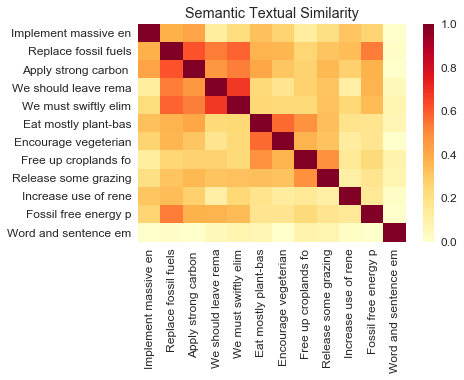

In [20]:
def plot_similarity(texts, embeddings, rotation):
    corr = np.inner(embeddings, embeddings)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=texts,
      yticklabels=texts,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
    g.set_xticklabels([elem[:20] for elem in texts], rotation=rotation)
    g.set_yticklabels([elem[:20] for elem in texts], rotation=0)
    g.set_title("Semantic Textual Similarity")
    
#plot_similarity(urgent_messages, urgent_message_embeddings, 90)
plot_similarity(messages, example_message_embeddings, 90)
plt.show()

# References

Semantic similarity using USE: 
https://www.nishanpantha.com.np/programming/universal-sentence-encoder-semantic-search.html




